In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [7]:
df = pd.read_csv("kidney_disease.csv")

In [8]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
df.info

<bound method DataFrame.info of       id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  y

In [10]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
classification      0
id                  0
dtype: int64

In [11]:
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=cols_names, inplace=True)

In [12]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [13]:
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')
    

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] categories.

coronary_artery_disease has ['no' 'yes' '\tno' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'ckd\t' 'notckd'] categories.



In [14]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'no':'no','yes':'yes',' yes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = 'no', value='no')
df['classification'] = df['classification'].replace(to_replace = 'ckd', value = 'ckd')

In [15]:
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' '\tno' '\tyes' nan] categories.

coronary_artery_disease has ['no' 'yes' '\tno' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'ckd\t' 'notckd'] categories.



C:\Users\htiwa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\htiwa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\htiwa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

ValueError: could not convert string to float: '\t?'

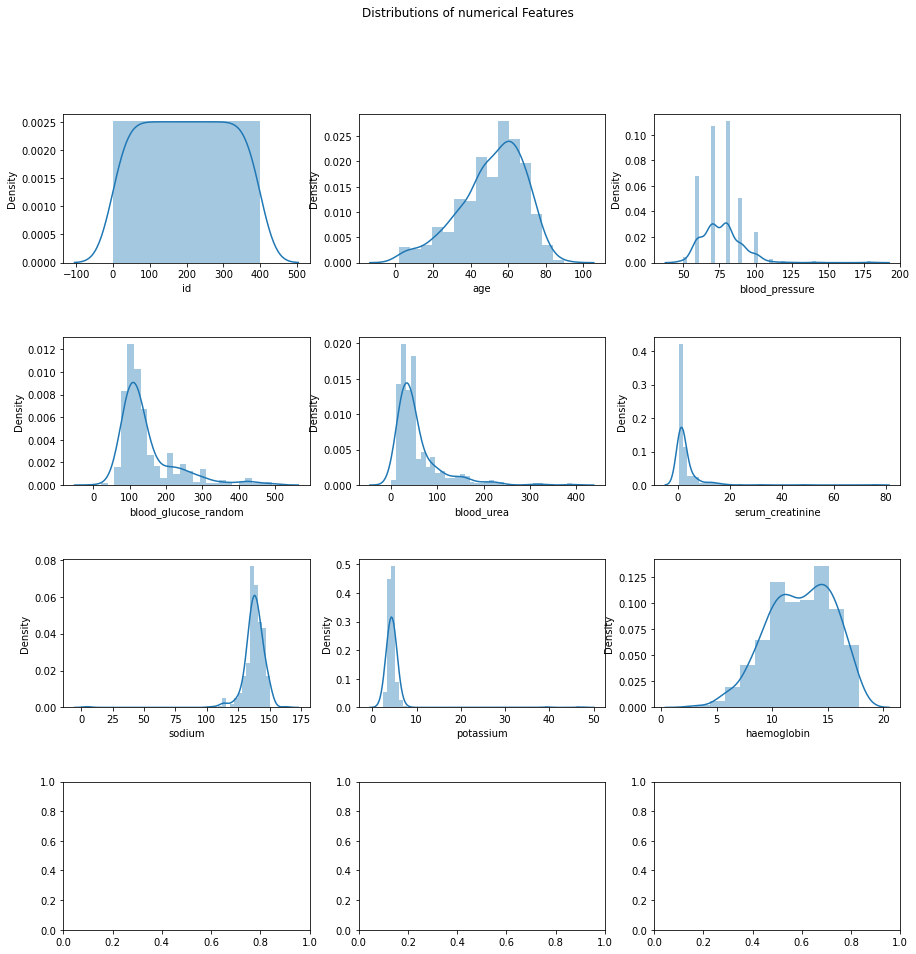

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')


for ax, feats in zip(axes.flatten(), numerical_features):
    sns.distplot(a=df[feats], ax=ax)

C:\Users\htiwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\htiwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\htiwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\htiwa\anaconda3\lib\si

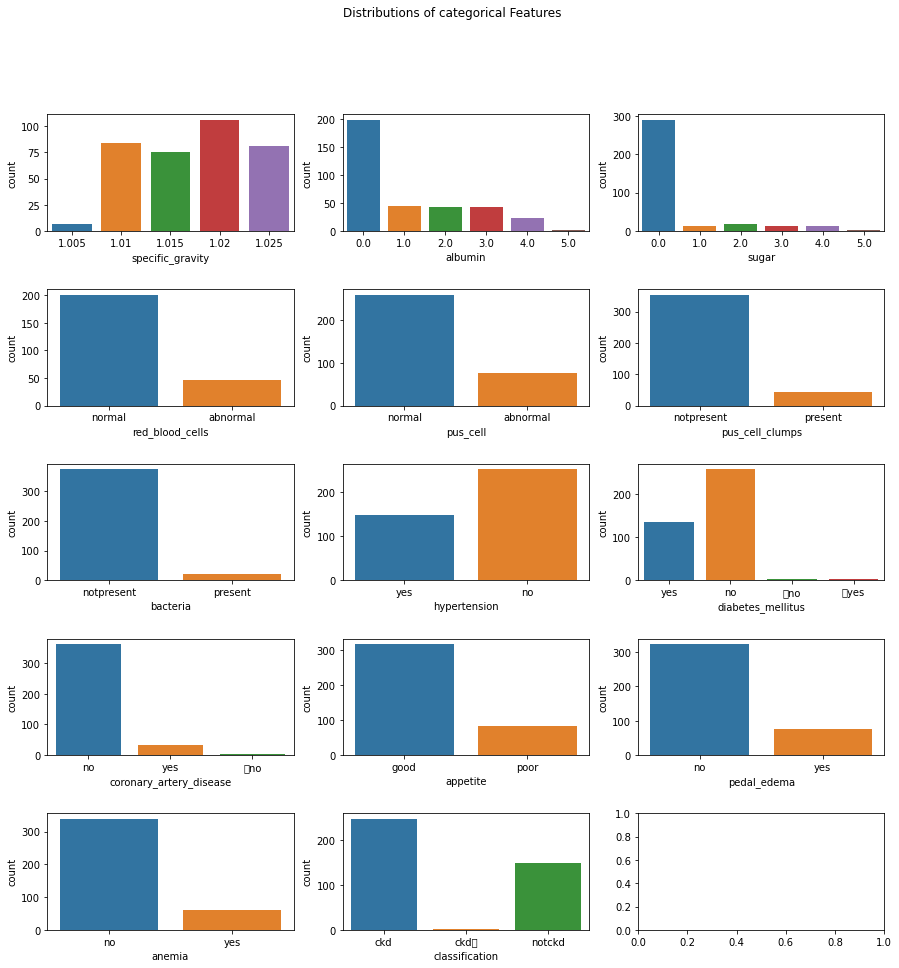

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for ax, feats in zip(axes.flatten(), categorical_features):
    sns.countplot(df[feats], ax=ax)

C:\Users\htiwa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\htiwa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


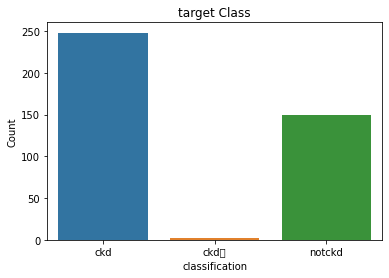

Percent of chronic kidney disease sample:  62.0 %
Percent of not a chronic kidney disease sample:  37.5 %


In [19]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']=='ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']=='notckd'])/len(df['classification'])*100,2),"%")

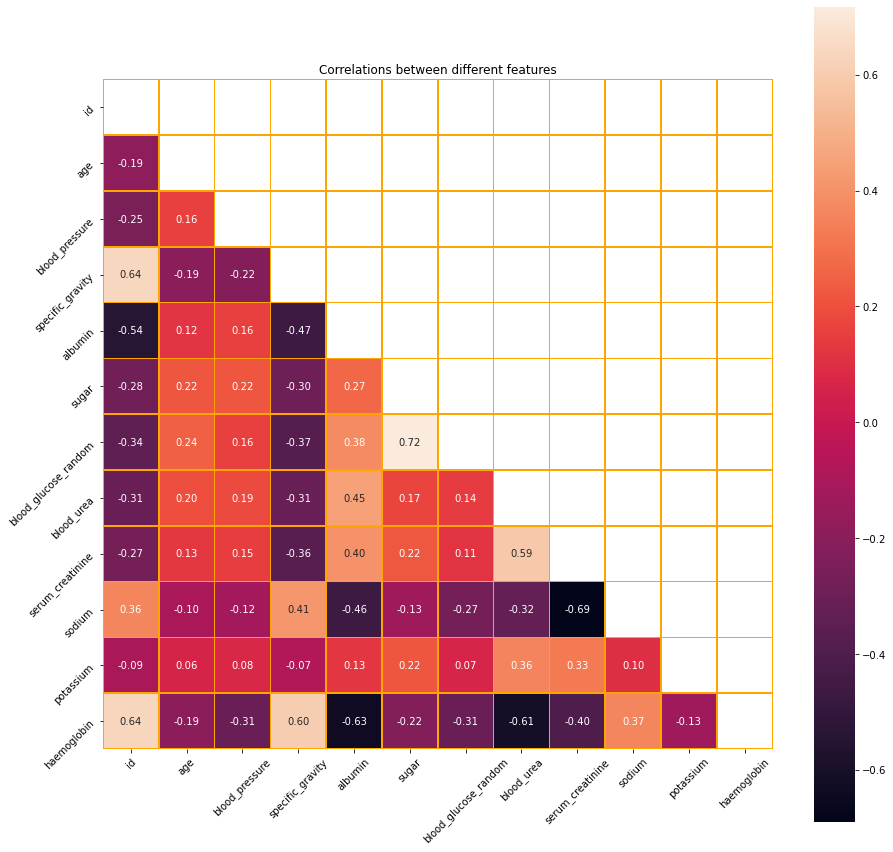

In [20]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different features')
plt.show()

In [ ]:
pickle